In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Use yfinance to download Nikkei225 and S&P500 daily data

start_date = '2021-01-01'
end_date = '2025-12-31'
tickers = ["^N225", "^GSPC"]
data = yf.download(tickers, start_date, end_date, auto_adjust=False)

print("\nLast five rows of the data:\n", data.tail())

[*********************100%***********************]  2 of 2 completed


Last five rows of the data:
 Price         Adj Close                      Close                       High  \
Ticker            ^GSPC         ^N225        ^GSPC         ^N225        ^GSPC   
Date                                                                            
2025-12-24  6932.049805  50344.101562  6932.049805  50344.101562  6937.319824   
2025-12-25          NaN  50407.789062          NaN  50407.789062          NaN   
2025-12-26  6929.939941  50750.390625  6929.939941  50750.390625  6945.770020   
2025-12-29  6905.740234  50526.921875  6905.740234  50526.921875  6920.209961   
2025-12-30  6896.240234  50339.480469  6896.240234  50339.480469  6913.250000   

Price                             Low                       Open  \
Ticker             ^N225        ^GSPC         ^N225        ^GSPC   
Date                                                               
2025-12-24  50636.949219  6904.910156  50323.921875  6904.910156   
2025-12-25  50510.109375          NaN  50283.7617

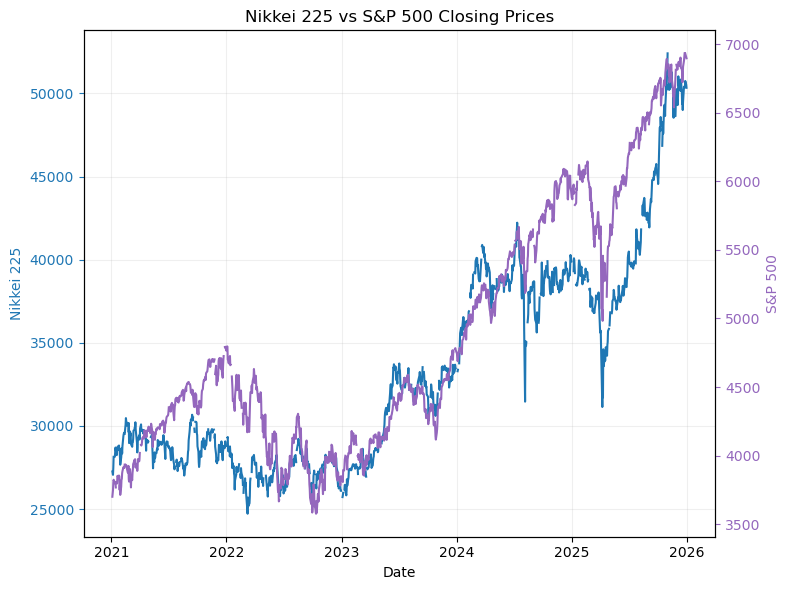

In [3]:
# Plot the Nikkei 225 and S&P 500 with separate price scales (i.e. independent y-axes on the left and right)

data_close = data['Adj Close']

fig, ax1 = plt.subplots(figsize=(8, 6))
color_n225 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.plot(data_close.index, data_close['^N225'], color=color_n225, label='Nikkei 225')
ax1.set_ylabel('Nikkei 225', color=color_n225)
ax1.tick_params(axis='y', labelcolor=color_n225, color=color_n225) # tick label color

ax2 = ax1.twinx()  # 2nd axis that shares the same x-axis
color_sp500 = 'tab:purple'
ax2.plot(data_close.index, data_close['^GSPC'], color=color_sp500, label='S&P 500')
ax2.set_ylabel('S&P 500', color=color_sp500)
ax2.tick_params(axis='y', labelcolor=color_sp500, color=color_sp500) 

# Add grid lines (aligned to the first axis)
ax1.grid(True, which="both", ls="-", alpha=0.2)

plt.title('Nikkei 225 vs S&P 500 Closing Prices')
fig.tight_layout()
plt.show()

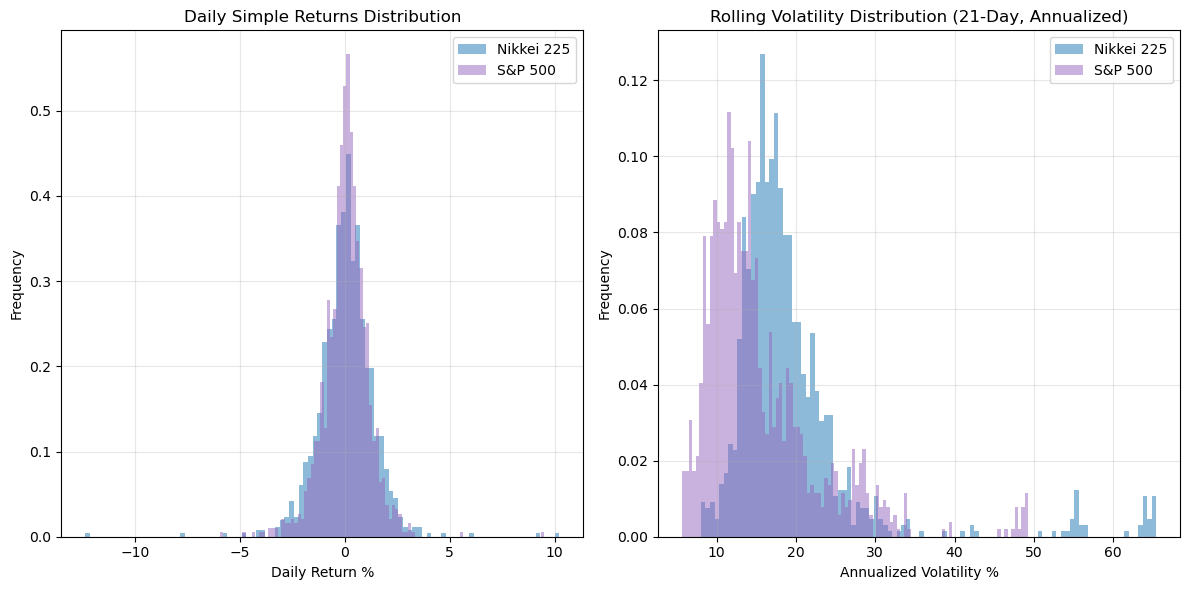

In [4]:
# Daily simple returns

#daily_returns = (data_close.ffill().pct_change())#.dropna() * 100 # when comparing indices from different time zones, downloading them in a single DataFrame and using .dropna() on the whole table forces a "joint" calendar; this effectively deletes any day where one market was open but the other was closed (e.g., US Thanksgiving or Japanese Marine Day)
return_n225 = ((data_close['^N225'] / data_close['^N225'].shift(1)) - 1).dropna()
return_sp500 = ((data_close['^GSPC'] / data_close['^GSPC'].shift(1)) - 1).dropna()

# Rolling volatility (21-day window, annualized)
vol_n225 = return_n225.rolling(window=21).std() * np.sqrt(252) 
vol_sp500 = return_sp500.rolling(window=21).std() * np.sqrt(252) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Subplot of return distributions 
ax1.hist((return_n225 * 100), bins=100, density=True, alpha=0.5, label='Nikkei 225', color=color_n225) # alpha=0.5 makes it semi-transparent
ax1.hist((return_sp500 * 100), bins=100, density=True, alpha=0.5, label='S&P 500', color=color_sp500) 
ax1.set_title('Daily Simple Returns Distribution')
ax1.set_xlabel('Daily Return %')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(alpha=0.3)

# Subplot of rolling volatility distributions
ax2.hist((vol_n225 * 100), bins=100, density=True, alpha=0.5, label='Nikkei 225', color=color_n225)
ax2.hist((vol_sp500 * 100), bins=100, density=True, alpha=0.5, label='S&P 500', color=color_sp500)
ax2.set_title('Rolling Volatility Distribution (21-Day, Annualized)')
ax2.set_xlabel('Annualized Volatility %')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

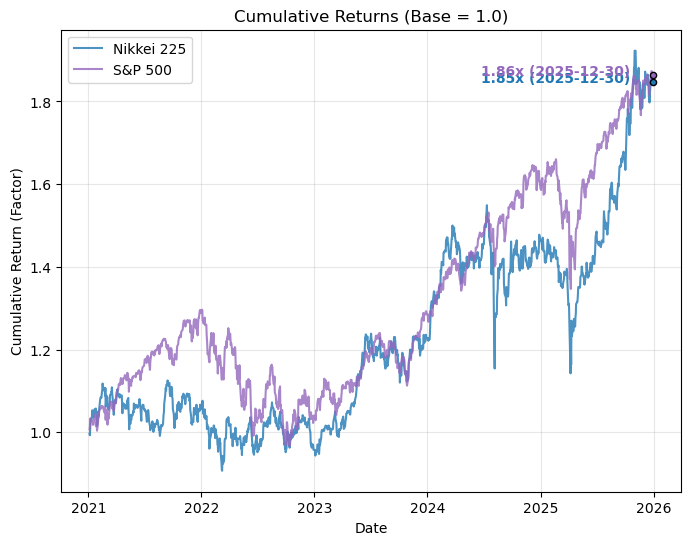

In [5]:
# Cumulative returns
cum_return_n225 = (data_close['^N225'].ffill().pct_change() + 1).cumprod()
cum_return_sp500 = (data_close['^GSPC'].ffill().pct_change() + 1).cumprod()

# Get the latest available data points
latest_date_n225 = cum_return_n225.index[-1]
latest_retn_n225 = cum_return_n225.iloc[-1]

latest_date_sp500 = cum_return_sp500.index[-1]
latest_retn_sp500 = cum_return_sp500.iloc[-1]

plt.figure(figsize=(8, 6))
plt.plot(cum_return_n225.index, cum_return_n225, label='Nikkei 225', color=color_n225, alpha=0.8)
plt.plot(cum_return_sp500.index, cum_return_sp500, label='S&P 500', color=color_sp500, alpha=0.8)

plt.scatter(latest_date_n225, latest_retn_n225, color=color_n225, s=20, edgecolors='black', zorder=5)
plt.annotate(f'{latest_retn_n225:.2f}x ({latest_date_n225.strftime("%Y-%m-%d")})', # the text to display
             (latest_date_n225, latest_retn_n225), # the point being annotated (arrow tip)
                textcoords="offset points", xytext=(-70,0), # the position of the text
                    ha='center', color=color_n225, weight='bold')

plt.scatter(latest_date_sp500, latest_retn_sp500, color=color_sp500, s=20, edgecolors='black', zorder=5)  
plt.annotate(f'{latest_retn_sp500:.2f}x ({latest_date_sp500.strftime("%Y-%m-%d")})', 
             (latest_date_sp500, latest_retn_sp500), 
                textcoords="offset points", xytext=(-70,0), 
                    ha='center', color=color_sp500, weight='bold')

plt.title('Cumulative Returns (Base = 1.0)')
plt.ylabel('Cumulative Return (Factor)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Portfolio return analysis 
ticker_list = ['NBIS', 'CRWV', 'IREN', 'CIFR', 'WULF']
data2 = yf.download(ticker_list, period='1y', auto_adjust=False)['Adj Close']

print("\nLast five rows of the data:\n", data2.tail())

[*********************100%***********************]  5 of 5 completed


Last five rows of the data:
 Ticker           CIFR       CRWV       IREN       NBIS   WULF
Date                                                         
2025-12-26  15.190000  76.419998  40.299999  87.589996  11.75
2025-12-29  15.080000  74.919998  39.410000  86.040001  11.42
2025-12-30  14.590000  73.900002  38.299999  85.169998  11.15
2025-12-31  14.760000  71.610001  37.770000  83.705002  11.49
2026-01-02  16.200001  79.320000  42.700001  89.949997  12.74



Correlation Matrix:
 Ticker      CIFR      CRWV      IREN      NBIS      WULF
Ticker                                                  
CIFR    1.000000  0.381365  0.755671  0.469947  0.619959
CRWV    0.381365  1.000000  0.407027  0.480975  0.257209
IREN    0.755671  0.407027  1.000000  0.494072  0.556178
NBIS    0.469947  0.480975  0.494072  1.000000  0.361420
WULF    0.619959  0.257209  0.556178  0.361420  1.000000


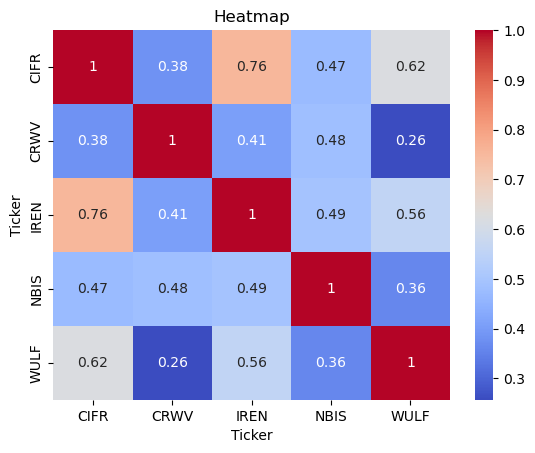

In [7]:
# Correlation and heatmap
retns = data2.pct_change().dropna()
correlation_matrix = retns.corr() # compute correlation
print("\nCorrelation Matrix:\n", correlation_matrix)

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") # annot: if True, displays numerical values inside the cells
plt.title("Heatmap")
plt.show()


Stock Metrics:
             MDD    Sharpe    Return       Vol
Ticker                                        
NBIS   -0.443009  2.215359  2.318591  1.030890
CRWV   -0.648382  1.285869  1.638367  1.247069
IREN   -0.557911  3.159547  3.008988  0.941334
CIFR   -0.427357  2.795839  3.174487  1.122986
WULF   -0.317391  2.233950  2.649137  1.170276


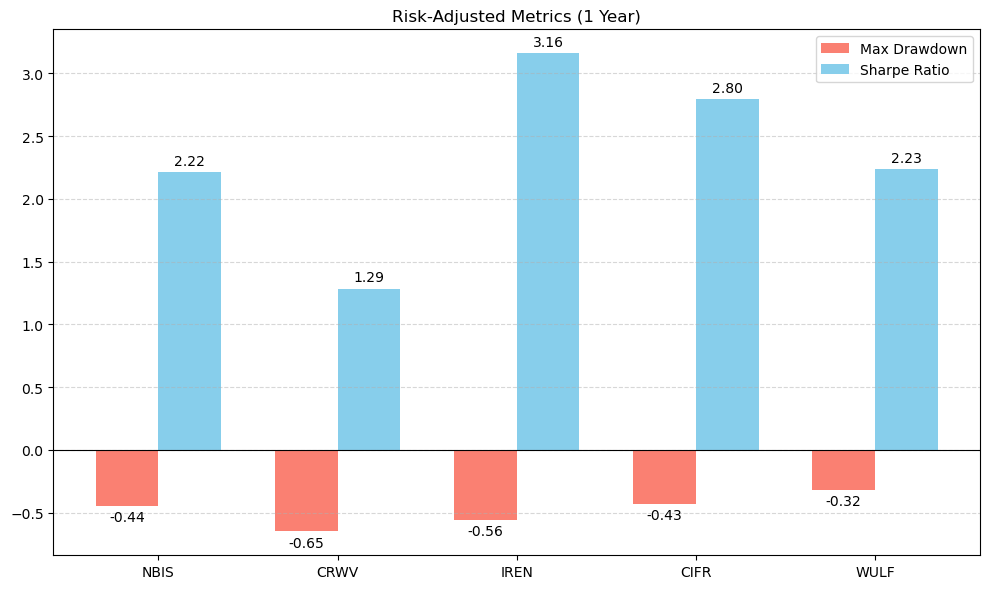

In [8]:
# Calculate maximum drawdown and Sharpe ratio

# Get the (1 year) risk-free interest rate from FRED (Federal Reserve Economic Data) 
import pandas_datareader as pdr
rf_rate_list = pdr.DataReader('DGS1', 'fred')
rf_rate = rf_rate_list['DGS1'].iloc[-1]/100

def max_drawdown(return_series):
    cum_retn = (return_series + 1).cumprod() 
    running_max = cum_retn.cummax() # cumulative maximum calculates the running maximum of a series, returning a new array where each element is the largest value seen so far up to that point
    drawdown = (cum_retn - running_max) / running_max
    return drawdown.min()

def sharpe_ratio(return_series, rf=rf_rate):
    ann_retn = return_series.mean() * 252 # annualized return
    vol = return_series.std() * np.sqrt(252) # annualized volatility
    sharpe = (ann_retn - rf) / vol
    return sharpe, ann_retn, vol

metrics = {'Ticker': [], 'MDD': [], 'Sharpe': [], 'Return': [], 'Vol': []}

for t in ticker_list:
    mdd = max_drawdown(retns[t])
    sharpe, ann_retn, vol = sharpe_ratio(retns[t])
  
    metrics['Ticker'].append(t)
    metrics['MDD'].append(mdd)
    metrics['Sharpe'].append(sharpe)
    metrics['Return'].append(ann_retn)
    metrics['Vol'].append(vol)

metrics_df = pd.DataFrame(metrics).set_index('Ticker')
print("\nStock Metrics:")
print(metrics_df)

# Plot bars
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics_df))
width = 0.35

bars1 = plt.bar(x - width/2, metrics_df['MDD'], width, label='Max Drawdown', color='salmon')
bars2 = plt.bar(x + width/2, metrics_df['Sharpe'], width, label='Sharpe Ratio', color='skyblue')

plt.title('Risk-Adjusted Metrics (1 Year)')
plt.xticks(x, metrics_df.index)
plt.axhline(0, color='black', linewidth=0.8) # zero line
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.bar_label(bars1, fmt='%.2f', padding=3)
plt.bar_label(bars2, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

[*********************100%***********************]  5 of 5 completed


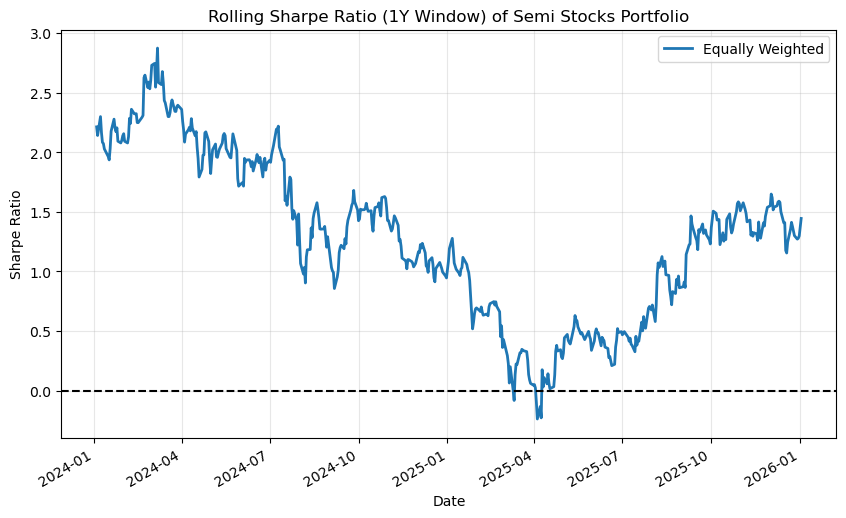

In [9]:
# Rolling Sharpe ratio

semi_tickers = ['NVDA', 'AVGO', 'TSM', 'ASML', 'INTC']

data3 = yf.download(semi_tickers,  period='3y', auto_adjust=False)['Adj Close']

returns = data3.pct_change().dropna()

equal_weight = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  

portfolio_return = returns.dot(equal_weight)

import pandas_datareader as pdr
rf_list = pdr.DataReader('DGS1', 'fred')
rf = rf_list / 100 # convert to decimal
rf = rf.reindex(returns.index).ffill() # align to trading days
rf_daily = rf['DGS1'] / 252

window_size = 252  # rolling window

def rolling_sharpe(returns, rf_daily, window):
    excess = returns - rf_daily
    mean = excess.rolling(window).mean()
    std = excess.rolling(window).std()
    return np.sqrt(252) * mean / std

sharpe = rolling_sharpe(portfolio_return, rf_daily, window_size)

plt.figure(figsize=(10,6))
sharpe.plot(label="Equally Weighted", lw=2)
plt.axhline(0, color='black', linestyle='--')
plt.title("Rolling Sharpe Ratio (1Y Window) of Semi Stocks Portfolio")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Date")
plt.legend()
plt.grid(alpha=0.3)
plt.show()